In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [9]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.327619,-0.829116,-0.381852,-0.511951,-1.603547,1
1,-0.141068,-0.863938,-1.613677,0.566033,2.544581,1
2,-0.299173,-0.877063,1.658278,-1.076798,-2.016051,0
3,-0.633586,1.345385,2.555690,-2.158144,-1.203034,0
4,-0.092956,0.548890,0.894057,-1.191285,-0.383082,0


In [28]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [47]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [51]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [52]:
df1 = combined_sampling(df,0.5,0.5)

NameError: name 'random' is not defined

In [34]:
df2 = combined_sampling(df,0.5,0.5)

In [50]:
df3 = combined_sampling(df,0.5,0.5)

NameError: name 'random' is not defined

In [36]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [37]:
df3

,col1,col2,col3,col4,col5,target
31,-2.519875,-0.621892,-1.983564,2.208977,0.809170,1
83,2.289784,-1.338195,0.012535,-1.684574,-2.305822,1
79,-1.553566,-1.572725,0.427411,-0.553609,-0.154627,0
36,-0.921751,-0.388827,-0.262221,0.199518,2.254103,0
4,-0.092956,0.548890,0.894057,-1.191285,-0.383082,0
22,-0.476162,-0.283817,-1.299881,0.340632,0.276255,1
14,-0.183899,0.305371,-0.431840,0.045624,-0.242857,1
28,-2.324881,0.038813,-2.766932,1.277479,2.204954,1
61,-0.050768,0.809636,-1.230606,-0.819456,0.640259,1
51,1.464467,-1.566229,-0.608578,-1.074796,-1.984143,1


In [38]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [39]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [40]:
from sklearn.tree import plot_tree

[Text(0.375, 0.9166666666666666, 'x[1] <= -2.184\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.75, 'x[0] <= -2.072\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= -1.419\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.5833333333333334, 'x[0] <= 2.673\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.625, 0.4166666666666667, 'x[0] <= -0.725\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.5, 0.25, 'x[1] <= -0.035\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.875, 0.41666666

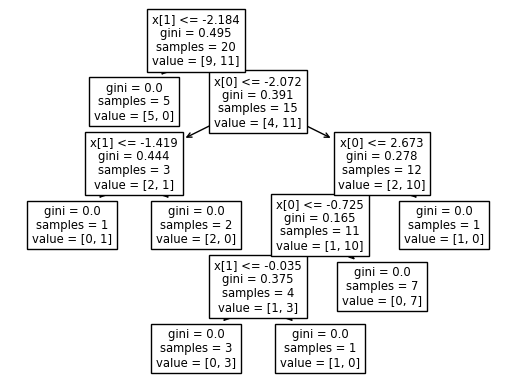

In [41]:
plot_tree(clf1)

[Text(0.4444444444444444, 0.9166666666666666, 'x[0] <= -2.304\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.2222222222222222, 0.75, 'x[1] <= -2.073\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.75, 'x[0] <= 0.722\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.5555555555555556, 0.5833333333333334, 'x[1] <= -0.225\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[1] <= -1.157\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2222222222222222, 0.25, 'x[0] <= -0.666\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.

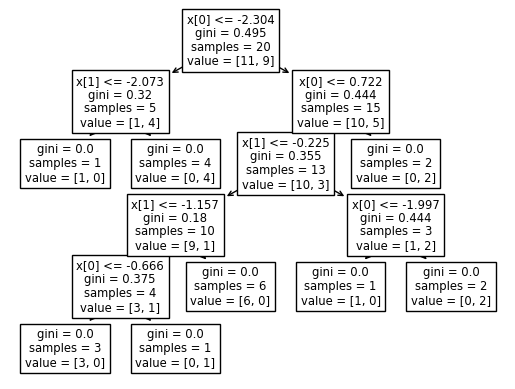

In [42]:
plot_tree(clf2)

[Text(0.6153846153846154, 0.9285714285714286, 'x[0] <= -0.699\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.46153846153846156, 0.7857142857142857, 'x[0] <= -2.307\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.38461538461538464, 0.6428571428571429, 'x[0] <= -2.547\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.3076923076923077, 0.5, 'x[1] <= -0.992\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.23076923076923078, 0.35714285714285715, 'x[0] <= -3.228\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.15384615384615385, 0.21428571428571427, 'x[0] <= -3.865\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.38461538461538464, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0

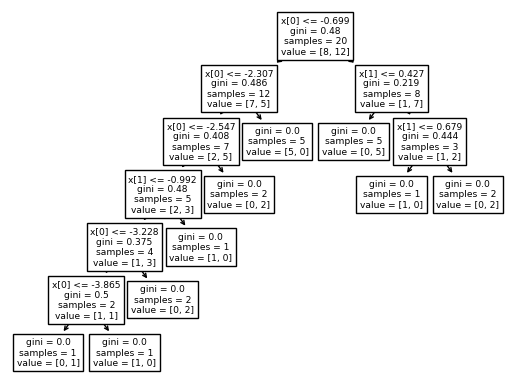

In [43]:
plot_tree(clf3)

In [44]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [45]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [46]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
df.sample(14,replace=True)

,humidity,wind,play
0,0,1,0
0,0,1,0
0,0,1,0
10,1,0,1
13,0,0,0
4,1,1,1
7,0,1,0
6,1,0,1
4,1,1,1
3,0,1,1
